# Decision trees

## Lecture 4

### GRA 4160
### Advanced Regression and Classification Analysis, Ensemble Methods And Neural Networks

#### Lecturer: Vegard H. Larsen

Decision trees are a type of algorithm that can be used for both classification and regression problems.
They are a popular method for supervised learning because they are easy to understand and interpret, and can handle both continuous and categorical variables.

A decision tree is built by recursively partitioning the data into subsets based on the values of the input features.
At each internal node of the tree, a test is performed on one of the input features, and the data is split into two or more subsets based on the outcome of the test.
The process is repeated for each subset until a stopping criteria is met.

At each leaf node of the tree, a class label or a constant value (mean response value) is stored which is used to make predictions for the instances that reach that leaf.

The goal is to find the splits that maximize the information gain or decrease the impurity of the subsets.
There are different measures of impurity, such as Gini impurity or entropy, which can be used depending on the problem.

Decision trees are sensitive to the noise in the data and can easily overfit if the tree is too deep.
To avoid overfitting, one can use pruning or regularization techniques like cost complexity pruning or limiting the max depth of the tree.

Decision trees can also be used as a base model for ensemble methods like Random Forest and Gradient Boosting.

### How to determine the best split at each node in the tree.

**Gini index** is used to evaluate the quality of a split between two sets of data. The smaller the Gini index, the more pure the split, meaning that the two sets are made up of more homogeneous classes.

The Gini index is calculated as follows:

$$Gini(S) = 1 - \sum(p_i)^2$$

Where $S$ is the set of data being split and $p_i$ is the proportion of items from class $i$ in the set.


**Entropy** is used to evaluate the quality of a split between two sets of data. The greater the entropy, the more mixed the classes in the set, meaning that the set is more disordered. The goal of splitting the data is to reduce the entropy and increase the homogeneity of the sets, which results in a more accurate and stable decision tree.

The entropy of a set $S$ is calculated as follows:

$$ Entropy(S) = -\sum(p_i \cdot \log(p_i))$$

Where $S$ is the set of data being split, $p_i$ is the proportion of items from class $i$ in the set.

## Classifying the Iris dataset using decision trees in scikit-learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Split the data into features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
score = clf.score(X_test, y_test)
print("Accuracy:", score.round(4))

Accuracy: 0.9778


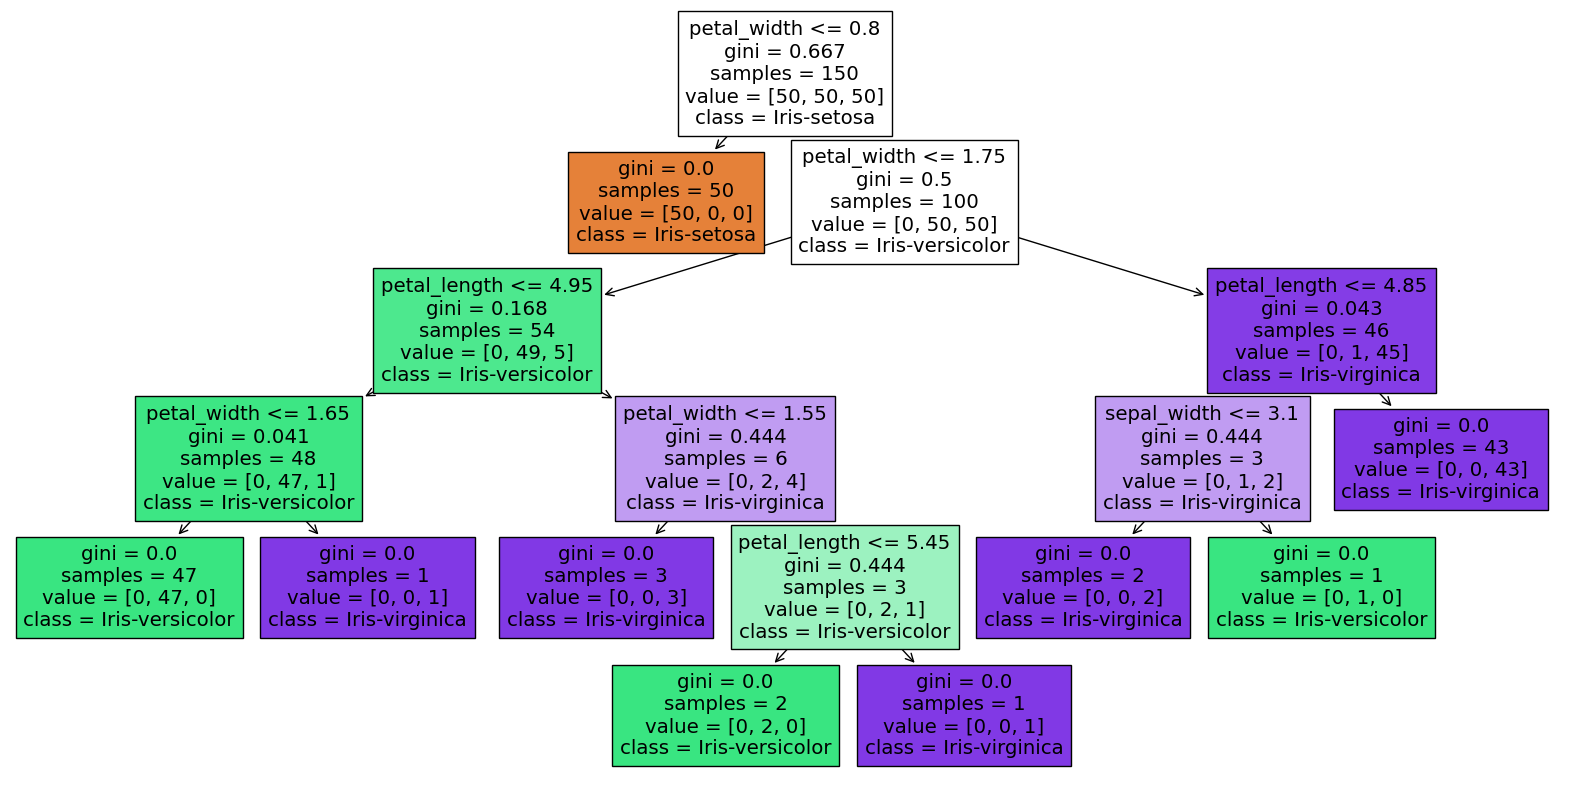

In [2]:
# Train a decision tree classifier using the gini index
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y))
plt.show()

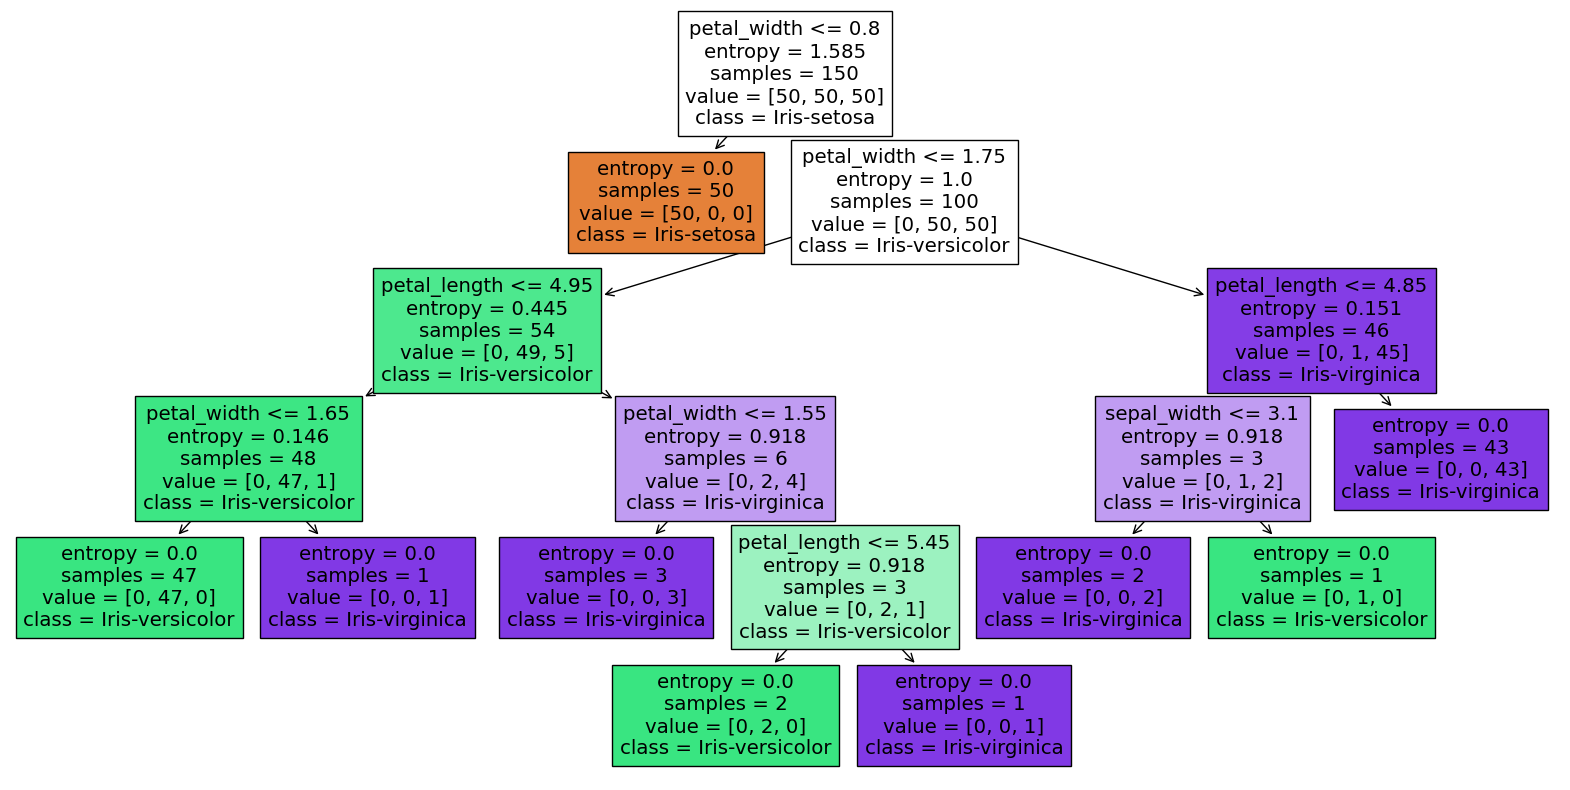

In [3]:
# Train a decision tree classifier using the entropy criterion
clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y))
plt.show()

## Pruning a decision tree

Pruning a decision tree refers to removing branches that provide little contribution to the prediction accuracy of the tree.
This results in a smaller and simpler tree that is less prone to overfitting.
The process of pruning involves removing parts of the tree that lead to low information gain, reduce the size of the tree, and avoid overfitting.

## Pruning a decision tree using Scikit-learn

We prune the tree by setting the `min_samples_leaf` hyperparameter to 5.
This hyperparameter determines the minimum number of samples required to be at a leaf node.
By setting this to 5, we effectively prevent the tree from splitting nodes that have less than 5 samples, which results in fewer and larger leaf nodes.

In [4]:
# Prune the tree by setting the min_samples_leaf hyperparameter
clf_pruned = DecisionTreeClassifier(min_samples_leaf=5, random_state=0)

# Train the classifier
clf_pruned.fit(X_train, y_train)

# Evaluate the classifier on the test set
score_pruned = clf_pruned.score(X_test, y_test)
print("Accuracy:", score_pruned.round(4))

Accuracy: 0.9111


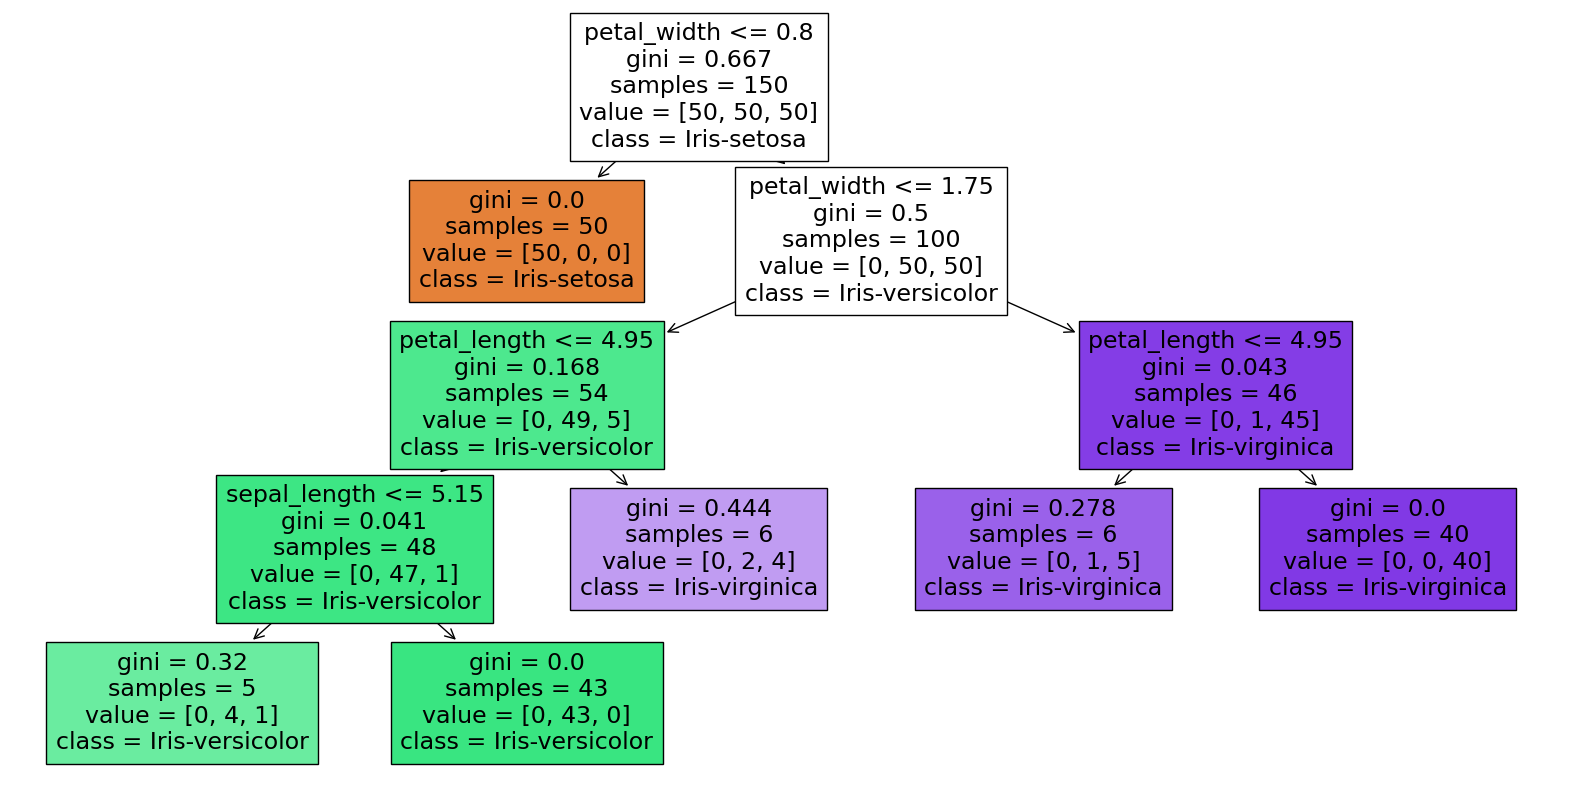

In [11]:
clf_pruned.fit(X, y)

# Plot the (smaller) decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_pruned, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y))
plt.show()